# Real-Time Data: COVID-19 Outbreak behaviour Vs Government Measures.
Create dataframes from source data
    Hopkins
    Italy
    Etc..
Plot source data
Calculate descriptive dataframes
    early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe
    early1k_countries = Earliest 1000 cases (country_name,date,number)
    early_highrate = Earliest highest rate (what date was the highest rate for each country) 
    etc...
Plot descriptive data

# Create DFD a DataFrame of deceased from Hopkins data

In [68]:
# -*- coding: utf-8 -*-
"""
Plot rates of changes per day and per country froo the COVID epidemic
Created on Thu Apr 23 00:03:57 2020
@author: pmannoni
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure #figure(num=None, figsize=(8, 6))
from numpy.polynomial import Legendre as L


covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfd=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesD= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfd.columns= colnamesD # Set new column names to df dataframe
dfd=dfd.drop(dfd.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfd.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
dfd
#colnamesD

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia/Australian Capital Territory,Australia/New South Wales,...,"Netherlands/Bonaire, Sint Eustatius and Saba",Malawi,United Kingdom/Falkland Islands (Malvinas),France/Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-08,109,31,488,47,2,3,293,43,3,44,...,0,3,0,0,0,0,5,7,1,12
2020-05-09,115,31,494,48,2,3,300,44,3,44,...,0,3,0,0,0,0,5,7,1,20
2020-05-10,120,31,502,48,2,3,305,45,3,44,...,0,3,0,0,0,0,5,8,1,20
2020-05-11,122,31,507,48,2,3,314,46,3,44,...,0,3,0,0,0,0,5,9,1,21


# Create DFC a DataFrame of confirmed from Hopkins data

In [69]:
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfc=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesC= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfc.columns= colnamesC # Set new column names to df dataframe
dfc=dfc.drop(dfc.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfc.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
#dfc

# Create DFR a DataFrame of recovered from Hopkins data

In [70]:
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfr=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnamesR= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfr.columns= colnamesR # Set new column names to df dataframe
dfr=dfr.drop(dfr.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfr.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
#dfr

# create IDFD,IDFC,IDFR from Italian government regional file

# Get cases per country

In [71]:
dfd['France'].loc[dfd.index = '1000']  

SyntaxError: invalid syntax (<ipython-input-71-b55691d3413b>, line 1)

In [72]:
#mcountries=['France','Italy','Spain','Portugal','Germany','United Kingdom','Tanzania','Sweden','Poland','Brazil','South Africa','US']
mcountries=['France','Italy','Spain','Portugal','Germany','United Kingdom','Brazil','US']
#colnamesD

   # Plot dfd of selected countries

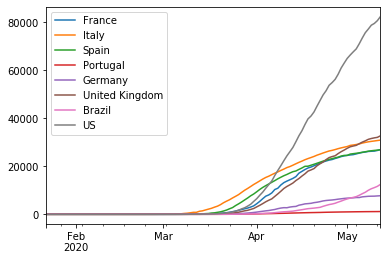

In [73]:
#  plot selected column with specific names of countries 
dfd[mcountries].plot()
#plt.savefig("line.jpg") # to save the figure as jpg

# Plot dfc of selected countries

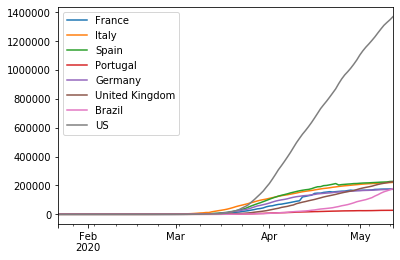

In [74]:
#  plot selected column with specific names of countries 
dfc[mcountries].plot()
#plt.savefig("line.jpg") # to save the figure as jpg

# Plot dfr of selected countries

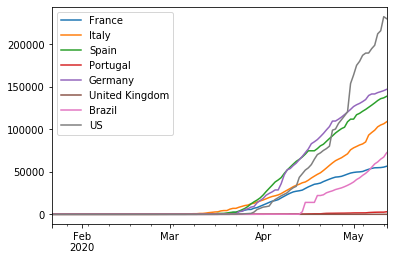

In [75]:
#  plot selected column with specific names of countries 
dfr[mcountries].plot()
#plt.savefig("line.jpg") # to save the figure as jpg

# Load file with confinement dates for each country

# Plot evolution with a line and circles where confinement ( conf) started


In [81]:
#Confinements dates & the date for the first confirmed case
df2=pd.read_csv('confinement_date.csv') # Dataframe of confinement
df2

,Unnamed: 0,France,Italy,Spain,Germany,Portugal,United Kingdom
0,First confirmed case,2020-01-24,2020-01-30,2020-01-02,2020-01-27,2020-03-02,2020-01-29
1,Begining first confinement,2020-03-17,2020-03-09,2020-03-15,2020-03-22,2020-03-19,2020-03-23
2,End of first confinement,2020-05-11,2020-05-04,2020-05-02,2020-05-04,2020-05-03,2020-05-29


In [82]:
#dfr=dfr.drop(dfr.index[[0,1,2,3]]) 
df2 = df2.drop(df2.columns[[0]], axis=1)# remove the first first  column
df2
#dfd

# Find the max value (maxvalue) and associated date (maxdate)in dfd_nc_fit
# create dfd_nc_fit_cf with filled Nan 
    # dfd_nc_fity_cf = dfd_nc_fit (with all values replaced by Nan)
    # check df.replace({'A': r'^ba.$'}, {'A': 'new'}, regex=True)
# put the value at the right date in dfd_nc_fit_cf
# dfd_nc_fit_cf['France'].loc[dfd_nc_fit_cf.index ==maxdate]=maxvalue


# plotting on dfd_nc_fit
#dfd_nc_fit_cf =
# index(dates) albania                           france
# 2020-02-10      Nan                            Nan
# 2020-02-11      Nan                           (value from dfd_nc_fit)
# 2020-02-12      (value from dfd_nc_fit)        Nan
# 2020-02-13      Nan                            Nan

,France,Italy,Spain,Germany,Portugal,United Kingdom
0,2020-01-24,2020-01-30,2020-01-02,2020-01-27,2020-03-02,2020-01-29
1,2020-03-17,2020-03-09,2020-03-15,2020-03-22,2020-03-19,2020-03-23
2,2020-05-11,2020-05-04,2020-05-02,2020-05-04,2020-05-03,2020-05-29


In [83]:
#countries = ['France','Italy','Spain','Germany','Portugal','United Kingdom']
#countries
#conf[countries].plot()


# Non cummulative data i.e. Daily data: prepared from cummulative data

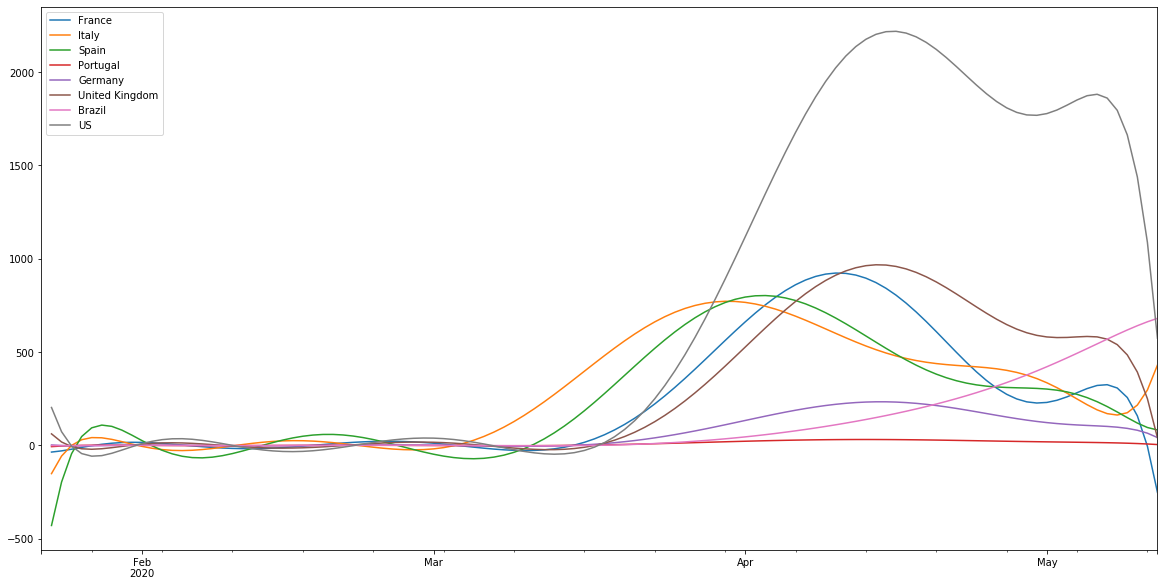

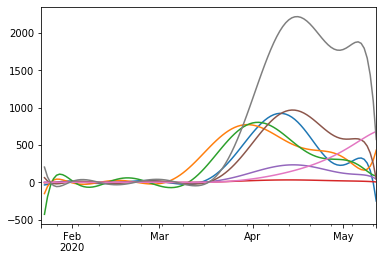

In [124]:
#Create daily data
dfd_nc = dfd.diff()
dfd_nc[mcountries].plot(legend=True,figsize=(20,10))

# Fitting data with Legendre Polynom
dfd_f=dfd
x = np.array(range(0,len(dfd.index)))

## loop over all the columns of dfd
for colname in dfd_f.columns:
    y = np.array(list(dfd[colname]))
    p = L.fit(x, y, 10)
    xx, yy = p.linspace(len(x))
    dfd_f[colname]=yy
    
#Small window plot
dfd_nc=dfd.diff()
dfd_nc[mcountries].plot(legend=False)

## to save the figure as jpg
#plt.savefig("line.jpg")

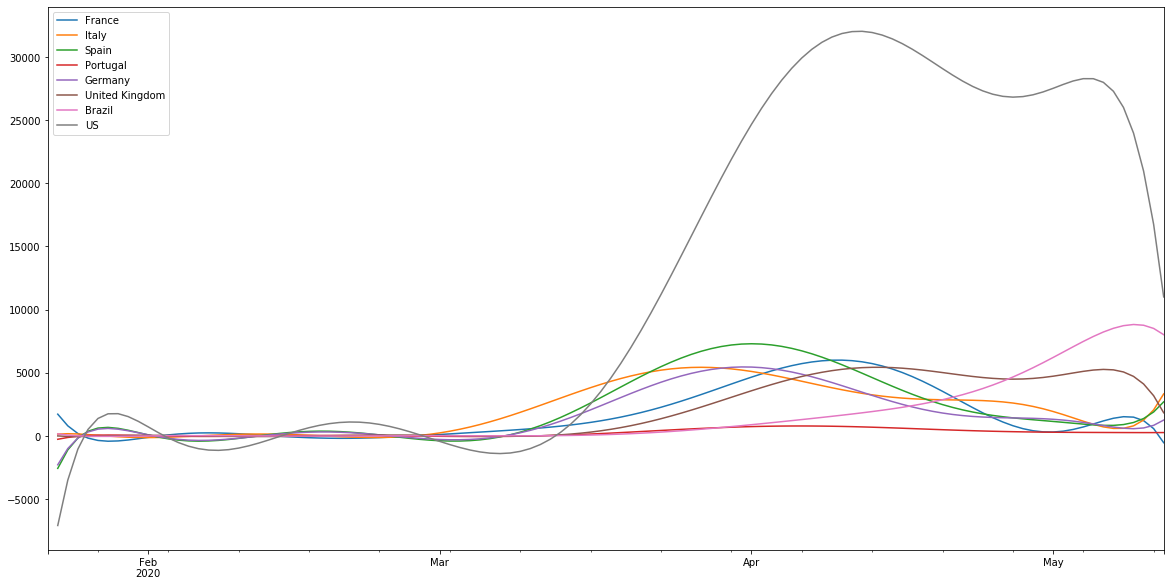

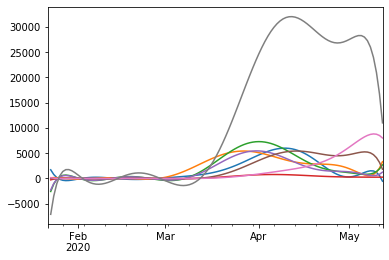

In [123]:
#Create daily data
dfc_nc = dfc.diff()
dfc_nc[mcountries].plot(legend=True,figsize=(20,10))

# Fitting data with Legendre Polynom
dfc_f=dfc
x = np.array(range(0,len(dfd.index)))

## loop over all the columns of dfc
for colname in dfc_f.columns:
    y = np.array(list(dfc[colname]))
    p = L.fit(x, y, 10)
    xx, yy = p.linspace(len(x))
    dfc_f[colname]=yy
#Small window plot
dfc_nc=dfc.diff()
dfc_nc[mcountries].plot(legend=False)

## to save the figure as jpg
#plt.savefig("line.jpg")

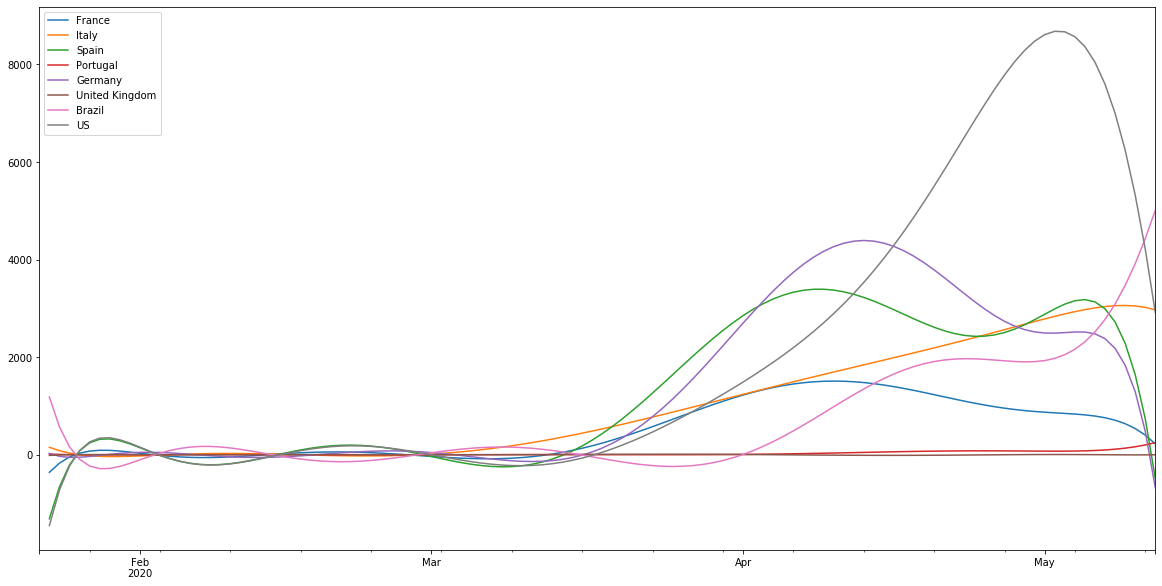

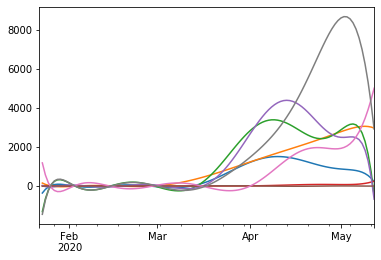

In [118]:
#Create daily data
dfr_nc = dfr.diff()
dfc_nc[mcountries].plot(legend=True,figsize=(20,10))

# Fitting data with Legendre Polynom
dfr_f=dfr
x = np.array(range(0,len(dfr.index)))

## loop over all the columns of dfr
for colname in dfr_f.columns:
    y = np.array(list(dfr[colname]))
    p = L.fit(x, y, 10)
    xx, yy = p.linspace(len(x))
    dfr_f[colname]=yy

#Small window plot
dfr_nc=dfr.diff()
dfr_nc[mcountries].plot(legend=False)

## to save the figure as jpg
#plt.savefig("line.jpg")

# Make code to sort countries (top 20) by 
Earliest epidemic start : 
Earliest rate down
Earliest highest rate
Earliest diminishing rate
Strongest diminishiong rates
Richest 
poorest
number of inhabitants

# Create lists of countries (dfd,dfc,dfr):
early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe

early1k_countries = Earliest 1000 cases (country_name,date,number)

early_highrate = Earliest highest rate (what date was the highest rate for each country) 



# Create
dataframe where index is number of days since 100th case for all countries 

In [90]:
#dfc
#dfc[dfc["date"] > 50]
#dfc['colnames'].loc[dfc.index > '1000']

# early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe

In [91]:
#dfr[mcountries].plot()
#plt.savefig("line.jpg") # to save the figure as jpg